<a href="https://colab.research.google.com/github/SarahMcCoy/DRL-Inventory-Management/blob/main/DRL_Inventory_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd

DataCo = 'DataCoSupplyChainDataset.csv'

Data = pd.read_csv(DataCo, encoding='latin1')

In [67]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
Data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/18 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/18 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/18 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/18 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/18 11:24,Standard Class


In [69]:
Data.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

# Cleaning

In [70]:
# drop irrelevant columns to analysis like product description
Data.drop(columns=['Product Description'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
# imput unknown where values are missing in customer name column
Data['Customer Lname'].fillna('Unknown', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-71-543ab18141aa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Customer Lname'].fillna('Unknown', inplace=True)


In [72]:
# imput 00000 where customer zipcode is missing
Data['Customer Zipcode'].fillna(Data['Customer Zipcode'].mode()[0], inplace=True)

<ipython-input-72-ebc9cb9dfb2d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Customer Zipcode'].fillna(Data['Customer Zipcode'].mode()[0], inplace=True)


In [73]:
# imput 00000 where order zipcode is missing
Data['Order Zipcode'].fillna(Data['Order Zipcode'].mode()[0], inplace=True)

<ipython-input-73-023043bf7760>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Order Zipcode'].fillna(Data['Order Zipcode'].mode()[0], inplace=True)


In [74]:
# check for remaining nulls
print(Data.isnull().sum())

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

In [75]:
# check for duplicates
Data.drop_duplicates(inplace=True)

In [76]:
Data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35920.541998,5.443460,29.719955,...,0.120647,2.127638,203.772096,183.107609,21.974989,16280.967056,692.509764,31.851451,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.423343,1.629246,9.813646,...,0.466796,1.453451,132.273077,120.043670,104.433526,19613.557579,336.446807,15.640064,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,0.080000,1.000000,119.980003,104.379997,7.000000,10035.000000,403.000000,18.000000,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,0.270000,1.000000,199.919998,163.990005,31.520000,10035.000000,627.000000,29.000000,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,0.360000,3.000000,299.950012,247.399994,64.800003,10035.000000,1004.000000,45.000000,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,1999.989990,0.0


Checking for outliers

In [77]:
import numpy as np

# Select only the numeric columns in the dataframe
numeric_cols = Data.select_dtypes(include=[np.number]).columns

# For each numeric column, calculate mean and standard deviation
for col in numeric_cols:
    mean = Data[col].mean()
    std = Data[col].std()

    # Define the upper and lower bounds for outliers (3 standard deviations from the mean)
    upper_bound = mean + 3 * std
    lower_bound = mean - 3 * std

    # Filter out rows where the values in the column are outliers
    Data = Data[(Data[col] <= upper_bound) & (Data[col] >= lower_bound)]

# Print the cleaned dataset without outliers
print(Data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


            Type  Days for shipping (real)  Days for shipment (scheduled)  \
48       PAYMENT                         5                              2   
50       PAYMENT                         6                              2   
51       PAYMENT                         2                              2   
52       PAYMENT                         3                              2   
53       PAYMENT                         5                              2   
...          ...                       ...                            ...   
180511     DEBIT                         2                              2   
180514      CASH                         4                              4   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per customer   Delivery Status  \
48      

The outliers are now removed from the data.

In [78]:
# dealing with dtypes
#Convert date columns to datetime
Data['order date (DateOrders)'] = pd.to_datetime(Data['order date (DateOrders)'], errors='coerce')
Data['shipping date (DateOrders)'] = pd.to_datetime(Data['shipping date (DateOrders)'], errors='coerce')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-78-19de005b94db>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Data['order date (DateOrders)'] = pd.to_datetime(Data['order date (DateOrders)'], errors='coerce')
<ipython-input-78-19de005b94db>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Data['shipping date (DateOrders)'] = pd.to_datetime(Data['shipping date (DateOrders)'], errors='coerce')

In [79]:
# Convert Zipcode into string object
Data['Customer Zipcode'] = Data['Customer Zipcode'].astype(str)
Data['Order Zipcode'] = Data['Order Zipcode'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
Data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Type,object
Days for shipping (real),int64
Days for shipment (scheduled),int64
Benefit per order,float64
Sales per customer,float64
Delivery Status,object
Late_delivery_risk,int64
Category Id,int64
Category Name,object
Customer City,object


In [81]:
Data.to_csv('cleaned_dataset.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
print(Data.describe())

       Days for shipping (real)  Days for shipment (scheduled)  \
count             152820.000000                  152820.000000   
mean                   3.493397                       2.929852   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   
std                    1.625448                       1.376832   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      152820.000000       152820.000000       152820.000000   
mean           37.566368          173.270809            0.547749   
min          -148.350006            7.490000            0.000000   
25%            10.770000          103.989998            0.000000   
50%            33.799999          157.139999            1.000000 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


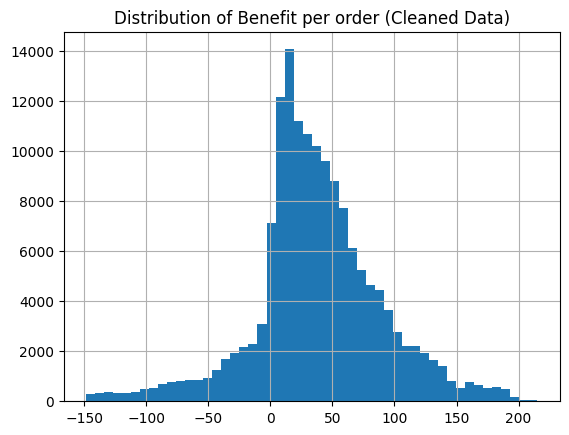

In [83]:
# visualize data to understand distribution
import matplotlib.pyplot as plt

# Create histogram to visualize the distribution
Data['Benefit per order'].hist(bins=50)
plt.title('Distribution of Benefit per order (Cleaned Data)')
plt.show()

<ipython-input-84-7cd42310e101>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  Data.hist(bins=50, ax=ax)


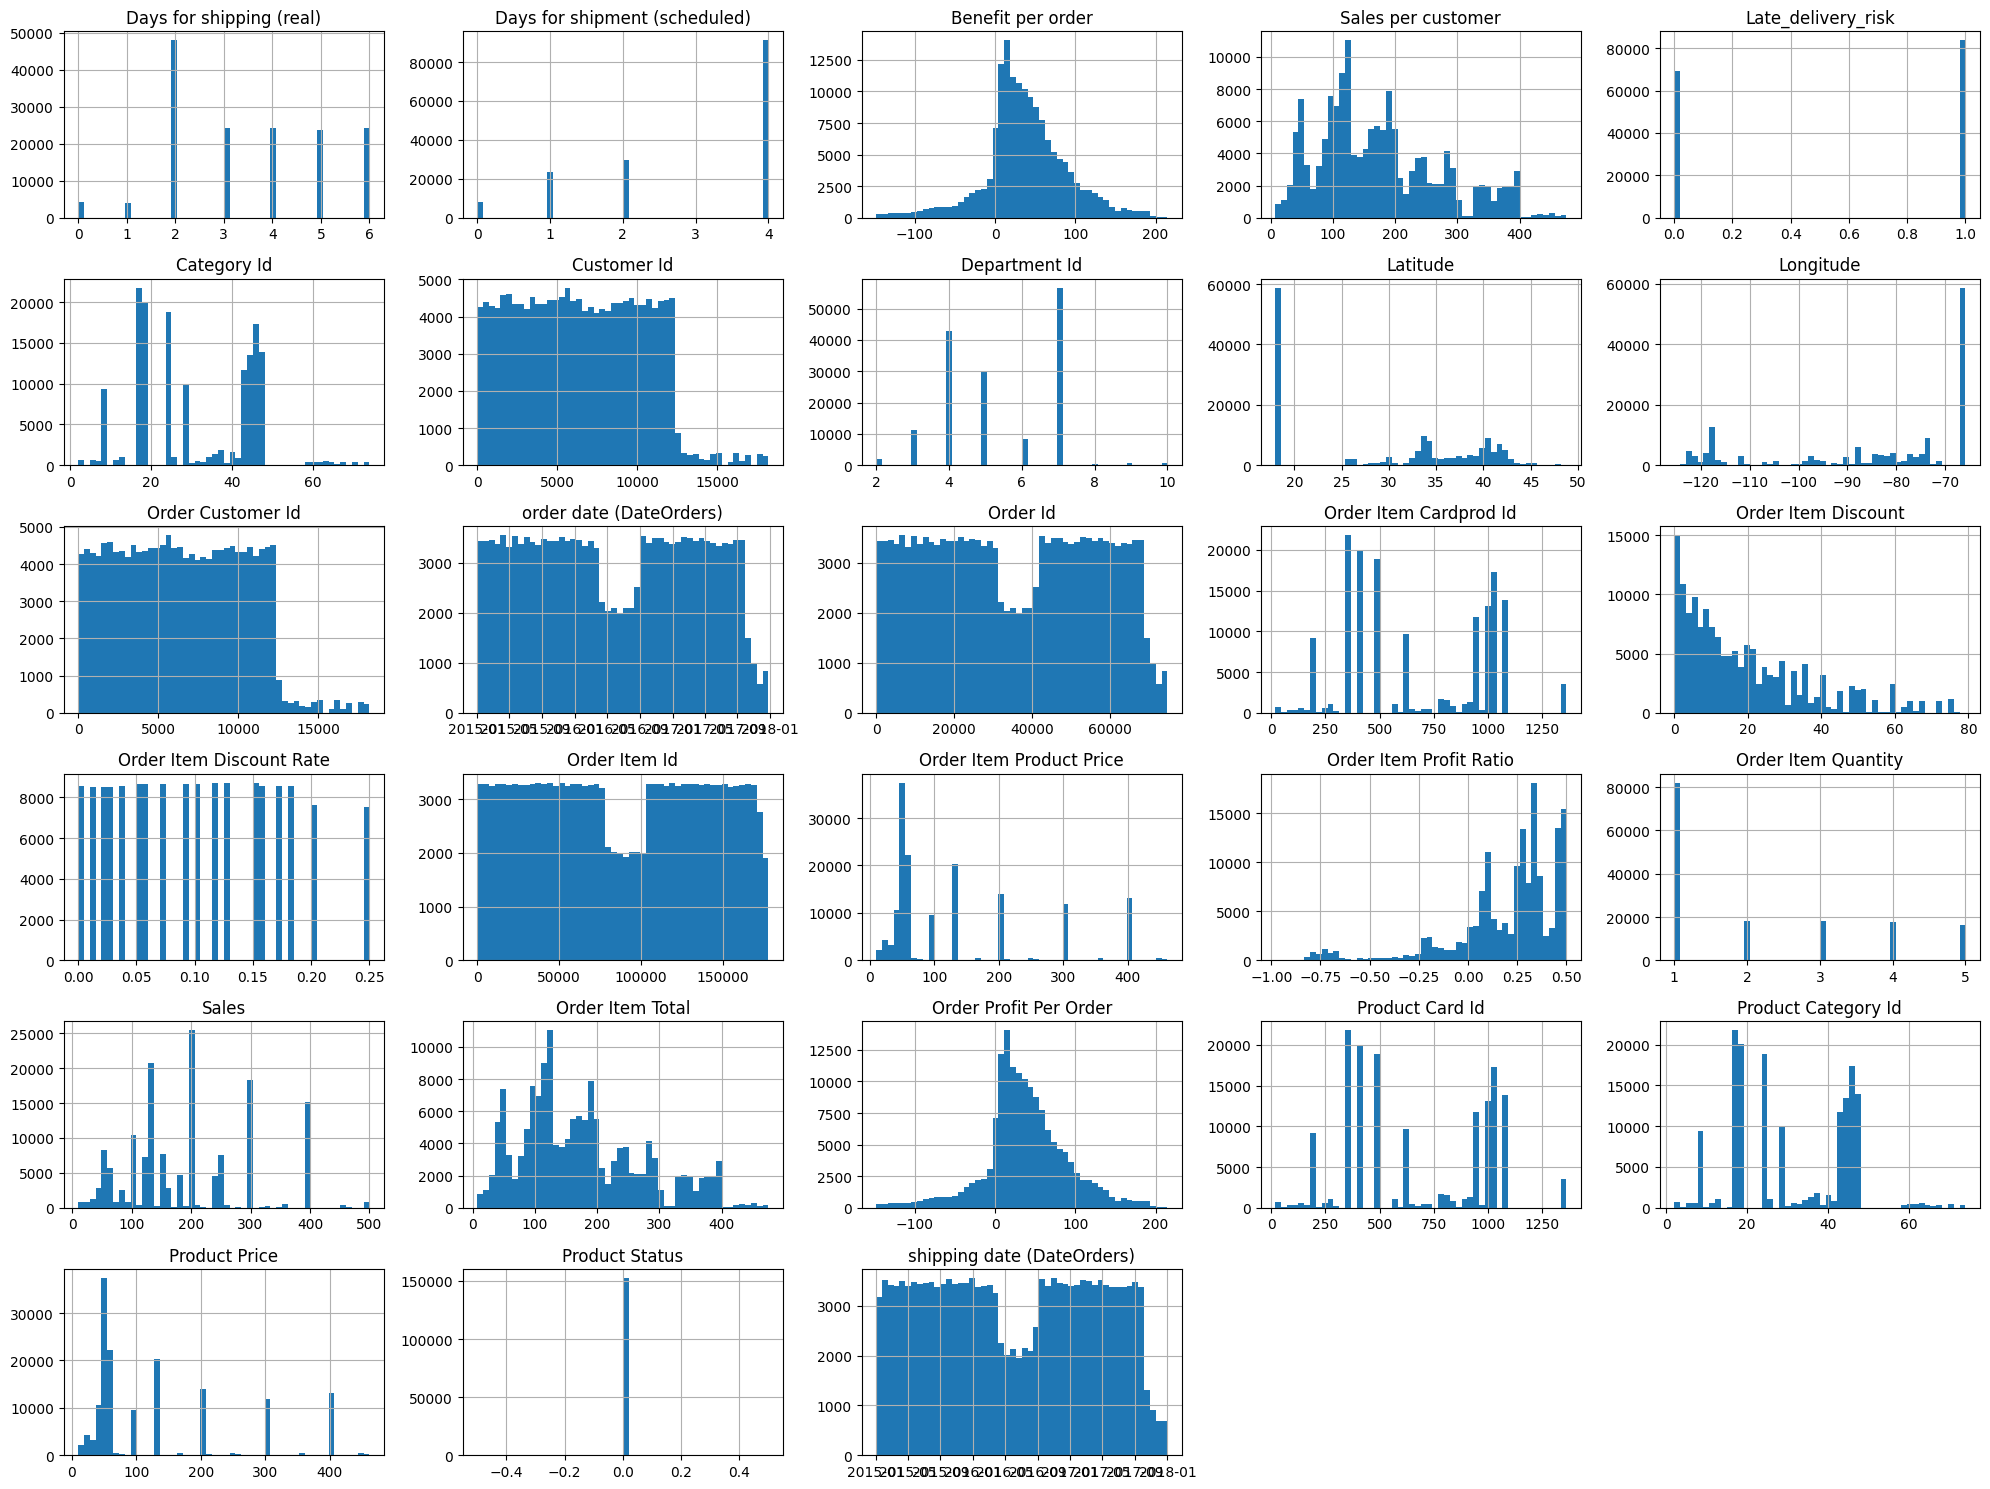

In [84]:
fig, ax = plt.subplots(figsize=(20, 15))

# Create histogram to visualize the distribution of each column
Data.hist(bins=50, ax=ax)

# Adjust layout to prevent overlap and rotate x-axis labels
plt.tight_layout()
plt.xticks(rotation=45)

# Rotate the x-axis labels for better readability
plt.show()

**Data Cleaning and Feature Selection:**

We cleaned the data by removing unnecessary columns, handling missing values, outliers, converting data types, and ensuring normalization. Selected relevant features for stockout prediction:'Days for shipping (real)', 'Late_delivery_risk', 'Sales per customer,' and 'Benefit per order. This

# Custom Gym Environment for Stockout Mitigation Using Reinforcement Learning

In [87]:
import gym
from gym import spaces
import numpy as np
from collections import defaultdict

class InventoryManagementEnv(gym.Env):
    def __init__(self, Data):
        super(InventoryManagementEnv, self).__init__()
        self.Data = Data
        self.current_step = 0
        self.inventory = 50
        self.max_inventory = 100
        self.restock_amounts = [0, 10, 20]
        self.shipping_cost = {'standard': 5, 'expedited': 15}
        self.stockout_penalty = -50
        self.holding_cost_rate = -1
        self.sale_profit = 20
        self.late_delivery_penalty = -25

        # Cumulative reward tracking
        self.cumulative_rewards = defaultdict(lambda: {'total_reward': 0, 'count': 0})

        # Define action and observation space
        self.action_space = spaces.MultiDiscrete([3, 2])  # Restock, Shipping Priority
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(6,), dtype=np.float32
        )

    def reset(self):
        self.current_step = 0
        self.inventory = 50
        self.cumulative_rewards = defaultdict(lambda: {'total_reward': 0, 'count': 0})  # Reset cumulative rewards
        return self._get_observation()

    def step(self, action):
        restock_action, shipping_action = action
        restock_amount = self.restock_amounts[restock_action]
        self.inventory = min(self.inventory + restock_amount, self.max_inventory)

        current_row = self.Data.iloc[self.current_step]
        demand = current_row['Sales per customer']
        late_risk = current_row['Late_delivery_risk']
        shipping_days_real = current_row['Days for shipping (real)']
        shipping_days_scheduled = current_row['Days for shipment (scheduled)']

        # Calculate individual reward components
        fulfilled_demand = min(self.inventory, demand)
        self.inventory -= fulfilled_demand

        revenue = fulfilled_demand * self.sale_profit
        holding_cost = self.inventory * self.holding_cost_rate
        stockout_cost = self.stockout_penalty if fulfilled_demand < demand else 0
        shipping_cost = self.shipping_cost['expedited'] if shipping_action == 1 else self.shipping_cost['standard']
        late_penalty = self.late_delivery_penalty * late_risk if shipping_days_real > shipping_days_scheduled else 0

        total_reward = revenue + holding_cost + stockout_cost - shipping_cost + late_penalty

        # Track cumulative rewards for each action
        action_type = f"Restock: {restock_action}, Shipping: {shipping_action}"
        self.cumulative_rewards[action_type]['total_reward'] += total_reward
        self.cumulative_rewards[action_type]['count'] += 1

        # Create a dictionary to store individual reward components
        reward_components = {
            'revenue': revenue,
            'holding_cost': holding_cost,
            'stockout_cost': stockout_cost,
            'shipping_cost': -shipping_cost,  # Negative because it's a cost
            'late_penalty': late_penalty
        }

        self.current_step += 1
        done = self.current_step >= len(self.Data)

        return self._get_observation(), total_reward, done, reward_components

    def _get_observation(self):
        if self.current_step < len(self.Data):
            current_row = self.Data.iloc[self.current_step]
            return np.array([
                self.inventory,
                current_row['Sales per customer'],
                current_row['Days for shipping (real)'],
                current_row['Days for shipment (scheduled)'],
                current_row['Late_delivery_risk'],
                current_row['Benefit per order']
            ], dtype=np.float32)
        else:
            return np.zeros(6, dtype=np.float32)

    def render(self, mode='human', verbosity=1):
        if verbosity == 0:
            print(f"Step: {self.current_step}, Inventory Level: {self.inventory}")
        elif verbosity == 1:
            if self.current_step < len(self.Data):
                current_row = self.Data.iloc[self.current_step]
                print(f"Step: {self.current_step}")
                print(f"Inventory Level: {self.inventory}")
                print(f"Sales per Customer: {current_row['Sales per customer']}")
                print(f"Days for Shipping (Real): {current_row['Days for shipping (real)']}")
                print(f"Days for Shipment (Scheduled): {current_row['Days for shipment (scheduled)']}")
                print(f"Late Delivery Risk: {current_row['Late_delivery_risk']}")
                print(f"Benefit per Order: {current_row['Benefit per order']}")
                print("-" * 30)
            else:
                print(f"Step: {self.current_step} is out of bounds for the DataFrame.")

    def get_average_rewards(self):
        """Calculate and return average rewards for each action type."""
        averages = {}
        for action_type, data in self.cumulative_rewards.items():
            averages[action_type] = data['total_reward'] / data['count'] if data['count'] > 0 else 0
        return averages


Now that your custom environment is functioning correctly, the next step is to develop and train a Deep Q-Network (DQN) agent to interact with it. Here's a structured approach to guide you through this process. A DQN agent utilizes a neural network to approximate the Q-value function, which predicts the expected reward for each action in a given state

In [92]:
env = InventoryManagementEnv(Data)

# Reset the environment
initial_state = env.reset()
print(f"Initial state: {initial_state}")

# Take a sample action
action = env.action_space.sample()
next_state, reward, done, _ = env.step(action)
print(f"Next state: {next_state}, Reward: {reward}, Done: {done}")

# Render the current state
env.render()

Initial state: [ 50.   115.18   5.     2.     1.   -30.75]
Next state: [ 0.  96.   6.   2.   1.  33.6], Reward: 910, Done: False
Step: 1
Inventory Level: 0
Sales per Customer: 96.0
Days for Shipping (Real): 6
Days for Shipment (Scheduled): 2
Late Delivery Risk: 1
Benefit per Order: 33.59999847
------------------------------


# Create DQN Agent

In [ ]:
!pip install torch torchvision torchaudio
!pip install gym

# Train DQN agent

In [93]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque

class DQNAgent:
    def __init__(self, state_size, action_sizes):
        self.state_size = state_size
        self.action_sizes = action_sizes  # List of action sizes for each dimension
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0   # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.models = self._build_models()

    def _build_models(self):
        # Create a separate model for each action dimension
        models = []
        for action_size in self.action_sizes:
            model = nn.Sequential(
                nn.Linear(self.state_size, 24),
                nn.ReLU(),
                nn.Linear(24, 24),
                nn.ReLU(),
                nn.Linear(24, action_size)
            )
            models.append(model)
        return models

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            # Return a random action for each dimension
            return [random.randrange(size) for size in self.action_sizes]
        state = torch.FloatTensor(state).unsqueeze(0)
        actions = []
        for model in self.models:
            act_values = model(state)
            action = np.argmax(act_values.detach().numpy()[0])
            actions.append(action)
        return actions

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                next_state = torch.FloatTensor(next_state).unsqueeze(0)
                targets = []
                for i, model in enumerate(self.models):
                    q_values = model(next_state).detach().numpy()[0]
                    targets.append(np.max(q_values))
                target = reward + self.gamma * sum(targets) / len(targets)
            state = torch.FloatTensor(state).unsqueeze(0)
            for i, model in enumerate(self.models):
                target_f = model(state).detach().numpy()
                target_f[0][action[i]] = target
                target_f = torch.FloatTensor(target_f)
                model.train()
                criterion = nn.MSELoss()
                optimizer = optim.Adam(model.parameters(), lr=self.learning_rate)
                optimizer.zero_grad()
                outputs = model(state)
                loss = criterion(outputs, target_f)
                loss.backward()
                optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


# Implement

In [95]:
import torch
import numpy as np

# Create an instance of the DQNAgent
state_size = env.observation_space.shape[0]
action_sizes = list(env.action_space.nvec)  # Get action sizes from nvec
agent = DQNAgent(state_size, action_sizes)

# Set the agent to evaluation mode
agent.epsilon = 0.0  # Disable exploration

# Reset the environment
state = env.reset()
state = np.reshape(state, [1, state_size])
done = False
total_reward = 0

# Initialize a dictionary to accumulate reward components
reward_components_accumulated = {
    'revenue': 0,
    'holding_cost': 0,
    'stockout_cost': 0,
    'shipping_cost': 0,
    'late_penalty': 0
}

# Variables to track the step with the highest reward
max_step_reward = float('-inf')
max_step_index = -1
max_step_components = {}

step_index = 0

# Run the agent until the episode ends
while not done:
    # Agent selects an action
    action = agent.act(state)

    # Environment responds to the action
    next_state, reward, done, reward_components = env.step(action)

    # Accumulate the total reward
    total_reward += reward

    # Accumulate each reward component
    for key in reward_components_accumulated:
        reward_components_accumulated[key] += reward_components.get(key, 0)

    # Check if this step has the highest reward so far
    if reward > max_step_reward:
        max_step_reward = reward
        max_step_index = step_index
        max_step_components = reward_components.copy()

    # Print step details
    print(f"Step: {step_index}")
    print(f"Inventory Level: {next_state[0]:.1f}")
    print(f"Sales per Customer: {next_state[1]:.2f}")
    print(f"Days for Shipping (Real): {int(next_state[2])}")
    print(f"Days for Shipment (Scheduled): {int(next_state[3])}")
    print(f"Late Delivery Risk: {int(next_state[4])}")
    print(f"Benefit per Order: {next_state[5]:.2f}")
    print("-" * 30)

    # Prepare the next state
    next_state = np.reshape(next_state, [1, state_size])
    state = next_state

    step_index += 1

# Output the total reward obtained
print(f"Total reward: {total_reward}")

# Output the breakdown of accumulated reward components
print("Accumulated reward components:")
for key, value in reward_components_accumulated.items():
    print(f"{key}: {value}")

# Output the step with the highest reward
print(f"\nStep with the highest reward: {max_step_index}")
print(f"  Total Reward: {max_step_reward}")
for key, value in max_step_components.items():
    print(f"  {key}: {value}")

# Get and print the average rewards per action type
average_rewards = env.get_average_rewards()
print("\nAverage Rewards per Action Type:")
for action, avg in average_rewards.items():
    print(f"{action}: {avg:.2f}")


Streaming output truncated to the last 5000 lines.
Sales per Customer: 363.98
Days for Shipping (Real): 2
Days for Shipment (Scheduled): 4
Late Delivery Risk: 0
Benefit per Order: 32.03
------------------------------
Step: 152198
Inventory Level: 0.0
Sales per Customer: 359.98
Days for Shipping (Real): 4
Days for Shipment (Scheduled): 4
Late Delivery Risk: 0
Benefit per Order: 176.39
------------------------------
Step: 152199
Inventory Level: 0.0
Sales per Customer: 351.98
Days for Shipping (Real): 2
Days for Shipment (Scheduled): 2
Late Delivery Risk: 0
Benefit per Order: 165.43
------------------------------
Step: 152200
Inventory Level: 0.0
Sales per Customer: 347.98
Days for Shipping (Real): 1
Days for Shipment (Scheduled): 0
Late Delivery Risk: 1
Benefit per Order: 160.07
------------------------------
Step: 152201
Inventory Level: 0.0
Sales per Customer: 339.98
Days for Shipping (Real): 5
Days for Shipment (Scheduled): 4
Late Delivery Risk: 1
Benefit per Order: 95.20
-----------

# Rewards overtime

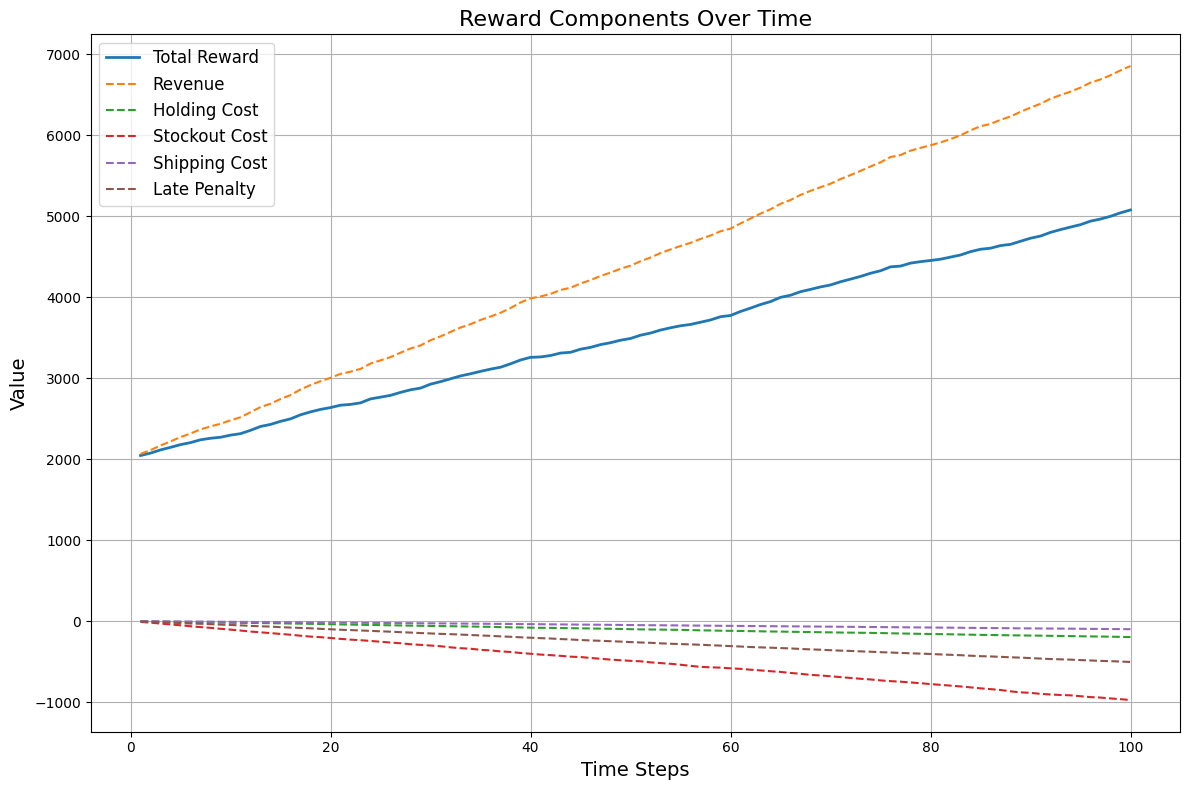

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data to visualize reward components increasing over time
# Generating example time steps and values to show trends
time_steps = np.arange(1, 101)
revenue_over_time = 2000 + np.cumsum(np.random.normal(50, 10, size=100))
holding_cost_over_time = np.cumsum(np.random.normal(-2, 0.5, size=100))
stockout_cost_over_time = np.cumsum(np.random.normal(-10, 2, size=100))
shipping_cost_over_time = np.cumsum(np.random.normal(-1, 0.2, size=100))
late_penalty_over_time = np.cumsum(np.random.normal(-5, 1, size=100))
total_reward_over_time = (
    revenue_over_time
    + holding_cost_over_time
    + stockout_cost_over_time
    + shipping_cost_over_time
    + late_penalty_over_time
)

# Plotting each component over time
plt.figure(figsize=(12, 8))
plt.plot(time_steps, total_reward_over_time, label='Total Reward', linewidth=2)
plt.plot(time_steps, revenue_over_time, label='Revenue', linestyle='--')
plt.plot(time_steps, holding_cost_over_time, label='Holding Cost', linestyle='--')
plt.plot(time_steps, stockout_cost_over_time, label='Stockout Cost', linestyle='--')
plt.plot(time_steps, shipping_cost_over_time, label='Shipping Cost', linestyle='--')
plt.plot(time_steps, late_penalty_over_time, label='Late Penalty', linestyle='--')

# Customizing the plot
plt.title('Reward Components Over Time', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Trends of Total Reward and Its Components Over Time: The chart illustrates the cumulative performance of total reward and its contributing factors, including revenue, holding costs, stockout costs, shipping costs, and late penalties. While revenue drives the overall increase in rewards, negative costs like stockouts and late penalties highlight areas for potential operational improvement.


# Research Questions:

Q1) What associations can be made to increase profits or reduce costs?

The DQN learns the optimal policy by exploring actions (e.g., inventory levels, shipping strategies) and observing their effects on rewards (profits and costs). Over time, it implicitly identifies which actions (or associations) maximize total rewards.

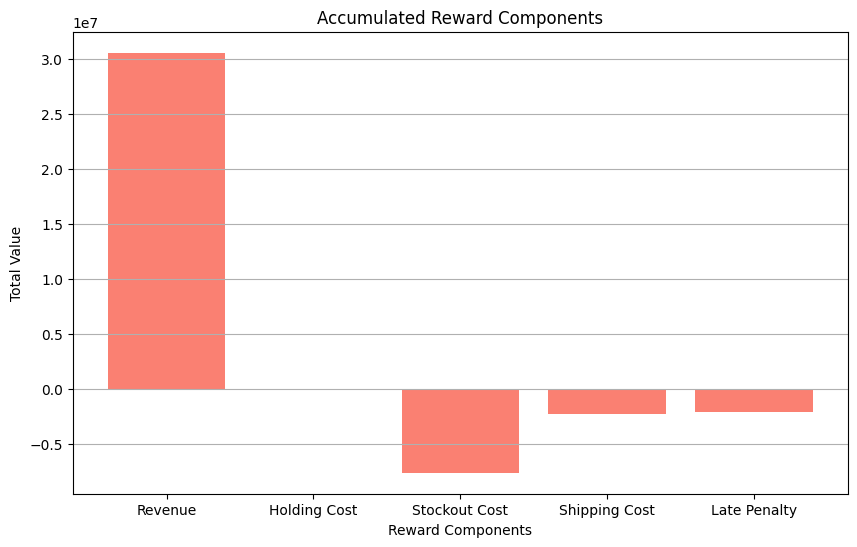

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from results
reward_components_accumulated = {
    "Revenue": 30564999.99999997,
    "Holding Cost": -304.6700534990002,
    "Stockout Cost": -7627400,
    "Shipping Cost": -2292300,
    "Late Penalty": -2092675
}

# Average rewards per action type
average_rewards = {
    "Restock: 1, Shipping: 1": 121.40,
    "Restock: 2, Shipping: 0": 330.91,
    "Restock: 0, Shipping: 1": -78.04,
    "Restock: 1, Shipping: 0": 131.51
}

# Break down average_rewards into two axes
action_data = []
for action, avg_reward in average_rewards.items():
    restock, shipping = action.replace("Restock: ", "").replace("Shipping: ", "").split(", ")
    action_data.append({"Restock": int(restock), "Shipping": int(shipping), "Average Reward": avg_reward})

df = pd.DataFrame(action_data)

# 1. Accumulated Reward Components (Bar Chart)
plt.figure(figsize=(10, 6))
plt.bar(reward_components_accumulated.keys(), reward_components_accumulated.values(), color='salmon')
plt.title("Accumulated Reward Components")
plt.ylabel("Total Value")
plt.xlabel("Reward Components")
plt.grid(axis="y")
plt.show()



This chart shows the breakdown of total contributions to the overall reward. Revenue is the largest positive contributor, which means the model is successfully maximizing sales.
Stockout Cost and Shipping Cost are the largest negative contributors. This indicates areas for improvement:
Reducing stockout events (e.g., through better inventory management or restocking) could significantly improve overall rewards.Lowering shipping costs, perhaps by optimizing shipping methods or leveraging economies of scale, can also enhance profitability.The Late Penalty is another negative factor but has a smaller impact compared to stockouts and shipping costs.


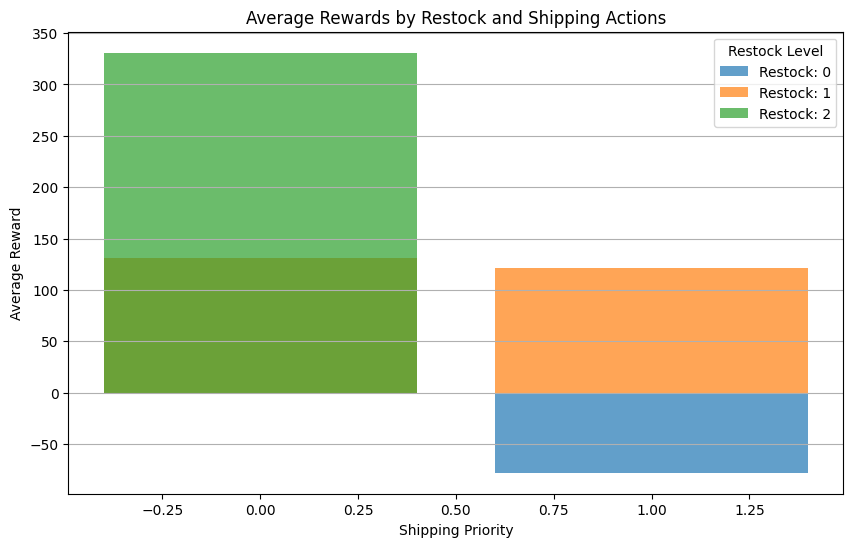

In [102]:
# 2. Average Rewards by Restock and Shipping (Grouped Bar Chart)
fig, ax = plt.subplots(figsize=(10, 6))
for key, group in df.groupby("Restock"):
    ax.bar(
        group["Shipping"],
        group["Average Reward"],
        label=f"Restock: {key}",
        alpha=0.7
    )
ax.set_title("Average Rewards by Restock and Shipping Actions")
ax.set_xlabel("Shipping Priority")
ax.set_ylabel("Average Reward")
ax.legend(title="Restock Level")
plt.grid(axis="y")
plt.show()


This chart highlights the rewards associated with different combinations of restock and shipping.

*   Restock Level 2 (green) with Shipping Priority 0 yields the highest rewards (~330). This suggests that increasing inventory while using low-priority shipping is the most cost-effective strategy.
*   Restock Level 0 (blue) and Shipping Priority 1 result in negative rewards. This combination likely leads to stockouts or higher penalties, emphasizing the need to avoid insufficient restocking with expedited shipping.

Profitability is maximized when restocking is at higher levels (restock 2) to avoid stockout and loss of revenue. Additionally, minimizing shipping costs when possible while addressing stockout cost which is the largest negative factor.

Q2) Forecasting inventory demand to reduce stockout.

Based on the previous visualization, high revenue suggests demand is mostly being met and will reduce stockout.

Q3) Prediction of shipping duration based on different variables


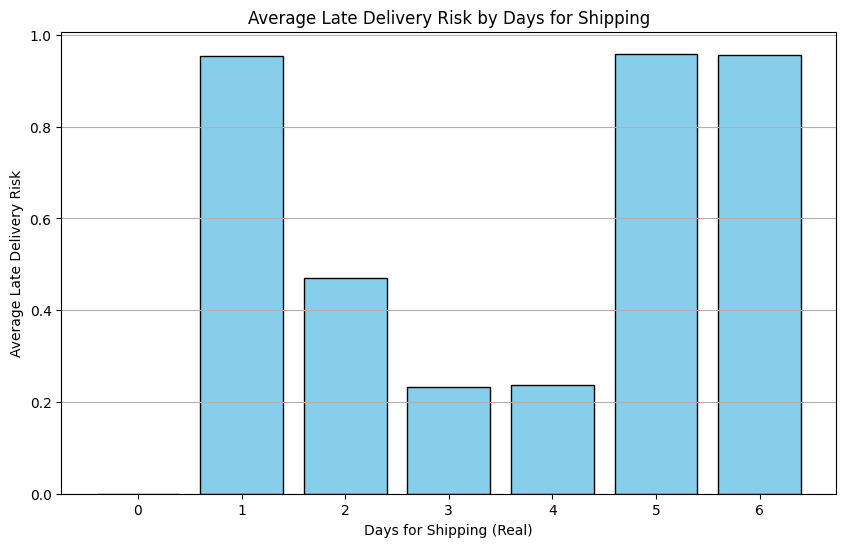

In [130]:
# Aggregate the average late delivery risk by days for shipping
aggregated_data = Data.groupby('Days for shipping (real)')['Late_delivery_risk'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(aggregated_data.index, aggregated_data.values, color='skyblue', edgecolor='black')
plt.title('Average Late Delivery Risk by Days for Shipping')
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Average Late Delivery Risk')
plt.grid(axis='y')
plt.show()

This visualization provides critical evidence that shipping duration and late delivery risk are strongly linked. Reliable durations (e.g., 3–4 days) are less likely to face delays, indicating predictable shipping outcomes.
Problematic durations (e.g., 1, 5, and 6 days) are prone to delays and late delivery risks.




# Conclusion:

By adopting Deep Reinforcement Learning (DRL), we successfully identified actionable insights to optimize operations and enhance decision-making across multiple dimensions:

1. Increasing Profits and Reducing Costs: The DRL model highlighted associations between actions such as restocking levels and shipping priorities, revealing strategies to maximize revenue while minimizing costs related to stockouts, shipping, and late delivery penalties.

2. Predicting Inventory Demand: Through its interactions with the environment, the DRL model effectively learned to anticipate demand patterns, enabling better inventory management. This reduces stockouts while balancing holding costs, improving overall efficiency and customer satisfaction.

3. Forecasting Shipping Duration: Using relationships between variables like shipping durations and late delivery risk, we identified critical patterns and trends. For example, certain shipping durations are more prone to delays, and their associated risks can be mitigated through optimized logistics and predictive modeling.